# **QBS 101.5: AD Image Classificiation Project with Machine Learning**

---

**Topic:**
Machine learning-based brain MRI analysis for early Alzheimer’s disease detection
    
**Dataset:** https://www.kaggle.com/datasets/yasserhessein/dataset-alzheimer

**Author:** Freya Ma

**Introduction:**
    
Alzheimer’s disease (AD), a neurodegenerative disorder potentially caused by the development of beta-amyloid plaques in the brain, is the most common form of dementia and the fifth-leading cause of death among people over the age of 65 (AlSaeed & Omar, 2022). Although there is currently no cure for AD, early diagnosis and disease detection can help to improve quality of life in the elderly and slow down further deterioration in those who have already started to develop cognitive problems (Rasmussen & Langerman, 2019). With brain MRI scans, healthcare providers and researchers have the opportunities to detect brain abnormalities associated with mild cognitive impairment and can use these scanned images to visualize any potential shrinkage of the hippocampus.

This project aims to utilize machine learning to analyze brain MRI scans and identify patterns associated with Alzheimer’s disease. The objective of this project is to create an image classification model by extracting meaningful features from MRI images and training a Convolutional Neural Network (CNN) model to differentiate between healthy and disease-affected brains. The designed model will be trained to learn spatial patterns and relevant features from the MRI data, enabling accurate and time-efficient generalization to new, unseen MRI scans. Ultimately, the trained model can be deployed in clinical settings, providing automated diagnosis, aiding in early disease detection, and supporting timely intervention for improved patient outcomes.

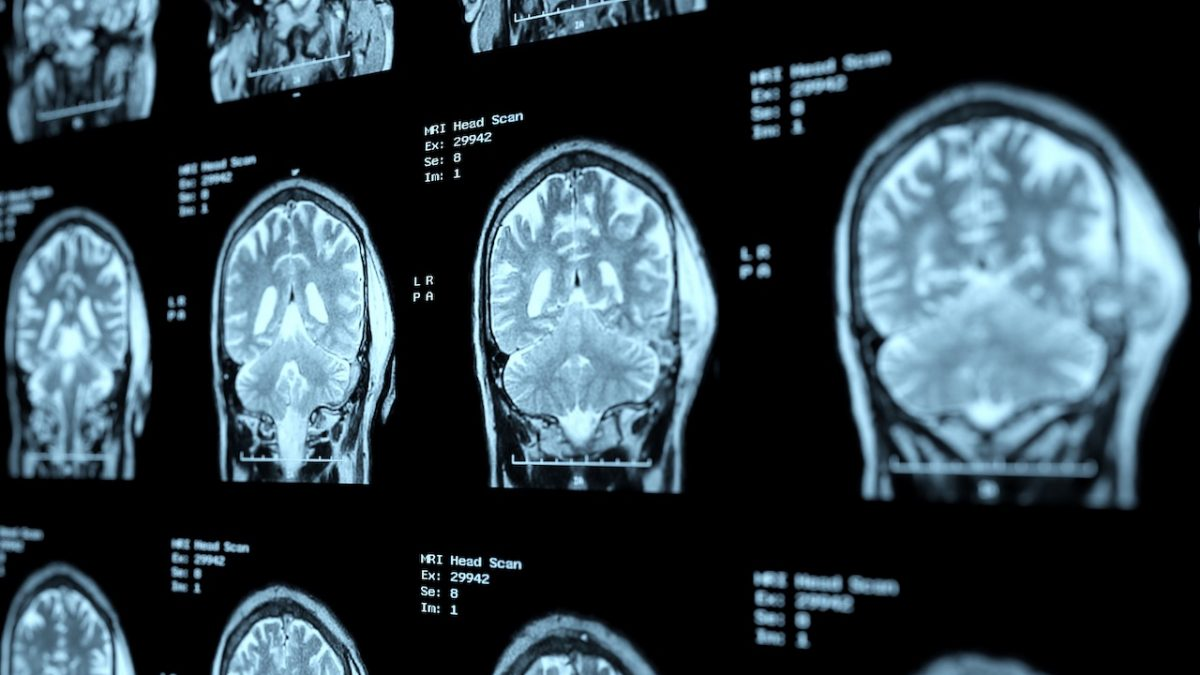

**Prior work:**
    
In recent years, deep-learning-based approaches have achieved great success across many diseases, including but not limited to Alzheimer’s disease analysis. In particular, lots of efforts have been made to develop strategies for early detection with the aid of machine learning and Convolutional Neural Networks. Several studies have proposed using image classification techniques for the diagnosis and detection system in AD (AlSaeed & Omar, 2022).

In early 2015, Liu et al. (2015) proposed an inherent structured-based multiview learning method (ISLM) for AD classification. It mainly involves 1) multiview feature extraction using multiple templates and gray matter tissues as tissue-segmented brain image for feature extraction, 2) subclass clustering-based feature selection through using voxel selection, and 3) use a support vector machine (SVM) based ensemble classification. The experiment result shows that proposed ISML method obtains an accuracy of 93.83% and specificity of 95.69%, and sensitivity of 92.78% for AD vs. normal controls (Liu et al., 2015).

More recently, AlSaeed and Omar (2022) proposed to apply transfer learning on a pre-trained AD diagnosis model ResNet50 using Softmax in the classifier layer. They then tested the proposed approach on the ADNI and MIRIAD dataset and concluded that the model with Softmax classifier outperforms SVM and RF in all performance measures (e.g., accuracy, specificity, and sensitivity). AlSaeed and Omar (2022) believe that a transfer learning approach using CNNs could be used to develop a low-cost and non-invasive diagnostic tool for Alzheimer’s disease.

Based on these published papers and other prior works, the most cost-effective solution for an MRI image classification system is to use and deploy a previously trained model (e.g., ResNet50). This approach will not only save time and money for healthcare providers but also allow them to achieve higher levels of disease detection accuracy. Ultimately, the goal of this project is to build a model that could be used to assist and achieve better patient outcomes, reduce unnecessary workloads for healthcare providers, and realize a more accessible and affordable healthcare environment.

**Data Description:**
    
The dataset is composed of two main sub-datasets: ‘Test’ and ‘Train’.

‘Train’ has 717 “MildDemented” scans, 52 “ModerateDemented” scans, 2560 “NonDemented” scans, and 1792 “VeryMildDemented” scans. In contrast, ‘Test’ has 179 “MildDemented” scans, 12 “ModerateDemented” scans, 640 “NonDemented” scans, and 448 “VeryMildDemented” scans. Both ‘Test’ and ‘Train’ datasets only have images in JPEG format. The total number of observations are 6400.

**Aims:**
    
***Aim 1: Training model***

1.1.  Ensure to resize all MRI scan images to a uniform size
1.2.  Train the model on the training data with a specified number of epochs

***Aim 2: Testing/classification model***

2.1.  Classify brain MRI scans into different stages of Alzheimer’s disease progression with the use of TensorFlow
2.2. Evaluate on testing data using an accuracy metric
2.3. Provide a guideline for this AD classification model (e.g., model accuracy, potential caveats)

**Expected Outcomes:**

This project has the potential to develop a Python-based machine-learning project to analyze brain MRI scans for AD diagnosis. It will use the Kaggle dataset and a convolutional neural network (CNN) to extract features from the imported MRI scans.

<div class="alert alert-block alert-danger"><b><font size=4>Disclaimer:</font></b>

The following project involves the utilization of transfering learning in CNN (using a pre-trained model on a similar task as a starting point for training a new model). <b><u>For more information on the pre-trained model (ResNet-50), please refer to the linke below:</u></b> https://datagen.tech/guides/computer-vision/resnet-50/</div>

# Model Building and Training

<div class ="alert alert-block alert-info"><b>Part 1: Installment and preparation<b></div>

In [1]:
#Install tensorflow. Please note that it might not work in the Anaconda Jupiter Notebook environemnt
#pip install tensorflow
#conda install tensorflow

Please make sure to upload both **"AD dataset.zip"** and **"resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"** to your Google colab 'files' if you are using Google Colab.

Please also make sure to run in GPU if you are running the Colab environment.

In [ ]:
# Unzip the dataset file
!unzip AD\ dataset.zip

In [3]:
# Allow access into google drive in collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load all necessary packages
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

<div class ="alert alert-block alert-info"><b>Part 2: Setting up parameters and data generators <b></div>

In [6]:
# Set and define parameters
epochs = 10
batch_size = 8
image_size = 180
train_dir = "/content/Alzheimer_s Dataset/train"
val_dir = "/content/Alzheimer_s Dataset/test"
save_model_path = "resnet50.h5"
classes = os.listdir(train_dir)
nb_classes = len(classes)

In [7]:
# Create data generators for data augmentations
train_datagen = ImageDataGenerator(rescale = 1./255,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,horizontal_flip = False, fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)

# Load both train and validation datasets with ImageDataGenerator
train_datagen = train_datagen.flow_from_directory(train_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
val_datagen = val_datagen.flow_from_directory(val_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')

# Calculate training and validation steps
train_steps = train_datagen.samples // batch_size
val_steps = val_datagen.samples // batch_size


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


<div class ="alert alert-block alert-info"><b>Part 3: Model Building and Training <b></div>

In [8]:
# Load ResNet50 pre-trained model and weights
base_model = ResNet50(include_top = False,weights="imagenet",input_shape=(image_size,image_size,3),pooling="avg")
base_model.load_weights("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

94765736/94765736 [==============================] - 3s 0us/step


In [9]:
# Create and build the model with ResNet50 and two additional dense layers
model = Sequential()
model.add(base_model)
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=nb_classes,activation="softmax"))

# Show layers and number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24,113,284
Trainable params: 24,060,164
Non-trainable params: 53,120
_________________________________________________________________


In [10]:
# Use the categorical_crossentropy loss function and Adam optimizer with a learing_rate equals 0.0001
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001),metrics = ['acc'])

# Save the best model based on the highest validation accuracy
checkpoint = ModelCheckpoint(save_model_path,monitor = 'val_acc',verbose = 1,save_best_only = True, mode="max")
callback_list = [checkpoint]

In [11]:
# Train the model with different parameters and save the model weights
history = model.fit(train_datagen,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              callbacks=callback_list,
                              validation_data=val_datagen,
                              validation_steps=val_steps)
model.save_weights("resnet50.h5")
print("save success")

Epoch 1/10
640/640 [==============================] - ETA: 0s - loss: 0.8559 - acc: 0.6131
Epoch 1: val_acc improved from -inf to 0.50079, saving model to resnet50.h5
640/640 [==============================] - 133s 126ms/step - loss: 0.8559 - acc: 0.6131 - val_loss: 2.5597 - val_acc: 0.5008
Epoch 2/10
640/640 [==============================] - ETA: 0s - loss: 0.5714 - acc: 0.7677
Epoch 2: val_acc improved from 0.50079 to 0.58962, saving model to resnet50.h5
640/640 [==============================] - 73s 114ms/step - loss: 0.5714 - acc: 0.7677 - val_loss: 1.4122 - val_acc: 0.5896
Epoch 3/10
640/640 [==============================] - ETA: 0s - loss: 0.3831 - acc: 0.8531
Epoch 3: val_acc improved from 0.58962 to 0.70833, saving model to resnet50.h5
640/640 [==============================] - 75s 118ms/step - loss: 0.3831 - acc: 0.8531 - val_loss: 1.0313 - val_acc: 0.7083
Epoch 4/10
640/640 [==============================] - ETA: 0s - loss: 0.2492 - acc: 0.9059
Epoch 4: val_acc did not impr

<div class ="alert alert-block alert-info"><b>Part 5: Performance Measurement and Visualization <b></div>

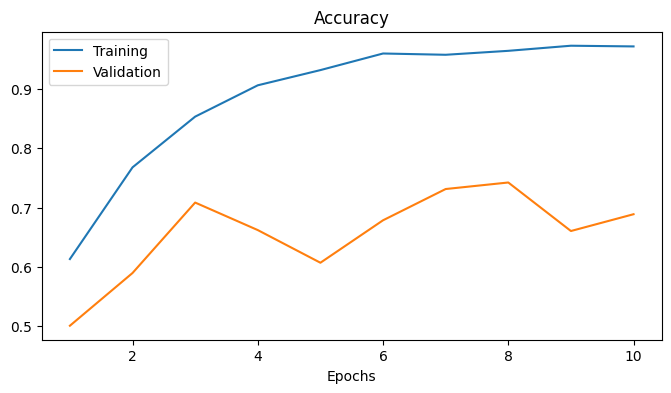

In [12]:
# Retrieve the training and validation accuracy values as well as the training and validation loss values
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of values representing the number of epochs for plotting the accuracy and loss values over the epochs
epochs_range = range(1,epochs + 1)

# Plot the accuracy graphs for training vs. validation datasets
plt.figure(figsize=(8,4))
plt.plot(epochs_range,acc,label="Training")
plt.plot(epochs_range,val_acc,label="Validation")
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title("Accuracy")
plt.savefig("Accuracy.jpg")
plt.show()

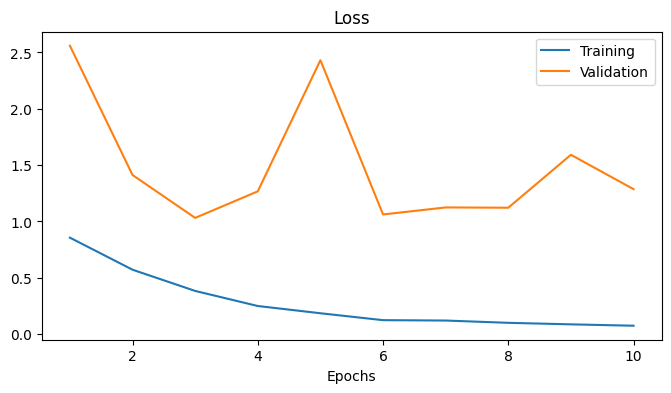

In [13]:
# Plot the loss graph for training vs. validation datasets
plt.figure(figsize=(8,4))
plt.plot(epochs_range,loss,label="Training")
plt.plot(epochs_range,val_loss,label="Validation")
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title("Loss")
plt.savefig("Loss.jpg")
plt.show()

# Prediction and Model Validation

<div class ="alert alert-block alert-info"><b>Part 6: MRI image predictions <b></div>

In [ ]:
# Load packages (includes repeated packages as mentioned previously)
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from PIL import Image
from tensorflow.keras.applications.resnet50 import ResNet50
import os
import time
import random

# Predict the model with the pre-trained ResNet50 model for image classification using transfer learning
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(image_size, image_size, 3), pooling='avg')
# Load pre-trained weights
base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
# Build custom classifiers and add additional dense layers
model = Sequential()
model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.load_weights(save_model_path)

# Define a function to predict and classify MRI images
# Use the trained model to predict the class labels of the input image
def predict(target_path):
    img = Image.open(target_path).convert('RGB').resize((image_size, image_size))
    img = np.asarray(img, dtype='float32').reshape((1, image_size, image_size, 3)) / 255.0
    Y_pred = model.predict(img)
    y_pred = np.argmax(Y_pred, axis=1)[0]
    return classes[y_pred]
path = "/content/Alzheimer_s Dataset/train"
dirs = os.listdir(path)

# Iterate through the directory (with image samples for different classes)
for dir in dirs:
  dir_path = os.path.join(path,dir)
  image_list = os.listdir(dir_path)
  image_list = random.sample(image_list,3)
  for image in image_list:
    image_path = os.path.join(dir_path,image)
    cls = predict(image_path)
    img = Image.open(image_path, 'r')
    print(image_path)
    plt.imshow(img)
    plt.axis('on') # can also turn off the axis
    plt.title('image')
    plt.show()
    print("class : ",cls)


# Performance with a Confusion Matrix

<div class ="alert alert-block alert-info"><b>Part 7: Confusion Matrix <b></div>

In [ ]:
###WIP: add a confusion matrix; mention validation error, look at the confusion matrix from the validation result

# Optimization Efforts I: Learning rates, horiziontal flips, and shear range



In [16]:
## Accuracy results with a 0.001 learning rate##
train_datagen = ImageDataGenerator(rescale = 1./255,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,horizontal_flip = False, fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)
# Load both train and validation datasets with ImageDataGenerator
train_datagen = train_datagen.flow_from_directory(train_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
val_datagen = val_datagen.flow_from_directory(val_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
# Calculate training and validation steps
train_steps = train_datagen.samples // batch_size
val_steps = val_datagen.samples // batch_size

# Load ResNet50 pre-trained model and weights
base_model = ResNet50(include_top = False,weights="imagenet",input_shape=(image_size,image_size,3),pooling="avg")
base_model.load_weights("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

# Create and build the model with ResNet50 and two additional dense layers
model = Sequential()
model.add(base_model)
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=nb_classes,activation="softmax"))

# Use the categorical_crossentropy loss function and Adam optimizer with a learing_rate equals 0.001
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['acc'])

# Save the best model based on the highest validation accuracy
checkpoint = ModelCheckpoint(save_model_path,monitor = 'val_acc',verbose = 1,save_best_only = True, mode="max")
callback_list = [checkpoint]

# Train the model with different parameters and save the model weights
history = model.fit(train_datagen,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              callbacks=callback_list,
                              validation_data=val_datagen,
                              validation_steps=val_steps)
model.save_weights("resnet50.h5")
print("save success")



Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
640/640 [==============================] - ETA: 0s - loss: 0.9842 - acc: 0.5330
Epoch 1: val_acc improved from -inf to 0.50157, saving model to resnet50.h5
640/640 [==============================] - 118s 122ms/step - loss: 0.9842 - acc: 0.5330 - val_loss: 3.0248 - val_acc: 0.5016
Epoch 2/10
640/640 [==============================] - ETA: 0s - loss: 0.8911 - acc: 0.5766
Epoch 2: val_acc did not improve from 0.50157
640/640 [==============================] - 71s 110ms/step - loss: 0.8911 - acc: 0.5766 - val_loss: 22.5961 - val_acc: 0.5008
Epoch 3/10
640/640 [==============================] - ETA: 0s - loss: 0.8817 - acc: 0.5820
Epoch 3: val_acc did not improve from 0.50157
640/640 [==============================] - 72s 113ms/step - loss: 0.8817 - acc: 0.5820 - val_loss: 1.0473 - val_acc: 0.4976
Epoch 4/10
640/640 [==============================] - ETA: 0s - loss: 0.8801 - acc: 0.5744
Epoch 4: v

In [17]:
## Accuracy results with a horizontal flip and without considering a shear_range##
train_datagen = ImageDataGenerator(rescale = 1./255,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip = True, fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)
# Load both train and validation datasets with ImageDataGenerator
train_datagen = train_datagen.flow_from_directory(train_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
val_datagen = val_datagen.flow_from_directory(val_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
# Calculate training and validation steps
train_steps = train_datagen.samples // batch_size
val_steps = val_datagen.samples // batch_size

# Load ResNet50 pre-trained model and weights
base_model = ResNet50(include_top = False,weights="imagenet",input_shape=(image_size,image_size,3),pooling="avg")
base_model.load_weights("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

# Create and build the model with ResNet50 and two additional dense layers
model = Sequential()
model.add(base_model)
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=nb_classes,activation="softmax"))

# Use the categorical_crossentropy loss function and Adam optimizer with a learing_rate equals 0.0001
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001),metrics = ['acc'])

# Save the best model based on the highest validation accuracy
checkpoint = ModelCheckpoint(save_model_path,monitor = 'val_acc',verbose = 1,save_best_only = True, mode="max")
callback_list = [checkpoint]

# Train the model with different parameters and save the model weights
history = model.fit(train_datagen,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              callbacks=callback_list,
                              validation_data=val_datagen,
                              validation_steps=val_steps)
model.save_weights("resnet50.h5")
print("save success")


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
640/640 [==============================] - ETA: 0s - loss: 0.8803 - acc: 0.5903
Epoch 1: val_acc improved from -inf to 0.52044, saving model to resnet50.h5
640/640 [==============================] - 115s 115ms/step - loss: 0.8803 - acc: 0.5903 - val_loss: 1.0338 - val_acc: 0.5204
Epoch 2/10
640/640 [==============================] - ETA: 0s - loss: 0.6659 - acc: 0.7074
Epoch 2: val_acc improved from 0.52044 to 0.58805, saving model to resnet50.h5
640/640 [==============================] - 73s 113ms/step - loss: 0.6659 - acc: 0.7074 - val_loss: 1.0322 - val_acc: 0.5881
Epoch 3/10
640/640 [==============================] - ETA: 0s - loss: 0.5328 - acc: 0.7851
Epoch 3: val_acc did not improve from 0.58805
640/640 [==============================] - 79s 124ms/step - loss: 0.5328 - acc: 0.7851 - val_loss: 0.9067 - val_acc: 0.5597
Epoch 4/10
640/640 [==============================] - ETA: 0s - loss:

In [ ]:
###WIP: Other things that we could change would be to change the optimizer (Adam) or batch size

# Other optimization Efforts: Binary Classes

In [ ]:
# To increase our accuracy and validity, we could also split the dataset into two classes instead of the original four classes
# Instead of having "Non demented", "Very Mild Demented", "Mild Demented" and "Moderate Demented", we will only have "Non demented" and "Mild to Moderate demented"
# Please note that we will consider "Non demented" as "Non demnted", and all others ("Very Mild Demented", "Mild Demented", and "Moderate Demented") as "Mild to Moderate demented" for image classifications

# Unzip the dataset file
!unzip AD2\ dataset.zip

In [16]:
# Load all necessary packages
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

In [17]:
# Set and define parameters
epochs = 10
batch_size = 8
image_size = 180
train_dir = "/content/Alzheimer_s Dataset2/train"
val_dir = "/content/Alzheimer_s Dataset2/test"
save_model_path = "resnet50.h5"
classes = os.listdir(train_dir)
nb_classes = len(classes)

# Create data generators for data augmentations
train_datagen = ImageDataGenerator(rescale = 1./255,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,horizontal_flip = False, fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)
# Load both train and validation datasets with ImageDataGenerator
train_datagen = train_datagen.flow_from_directory(train_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
val_datagen = val_datagen.flow_from_directory(val_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
# Calculate training and validation steps
train_steps = train_datagen.samples // batch_size
val_steps = val_datagen.samples // batch_size

# Load ResNet50 pre-trained model and weights
base_model = ResNet50(include_top = False,weights="imagenet",input_shape=(image_size,image_size,3),pooling="avg")
base_model.load_weights("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

# Create and build the model with ResNet50 and two additional dense layers
model = Sequential()
model.add(base_model)
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=nb_classes,activation="softmax"))

# Use the categorical_crossentropy loss function and Adam optimizer with a learing_rate equals 0.0001
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001),metrics = ['acc'])

# Save the best model based on the highest validation accuracy
checkpoint = ModelCheckpoint(save_model_path,monitor = 'val_acc',verbose = 1,save_best_only = True, mode="max")
callback_list = [checkpoint]

# Train the model with different parameters and save the model weights
history = model.fit(train_datagen,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              callbacks=callback_list,
                              validation_data=val_datagen,
                              validation_steps=val_steps)
model.save_weights("resnet50.h5")
print("save success")


Found 5121 images belonging to 2 classes.
Found 1098 images belonging to 2 classes.
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
### Similar issue: https://github.com/keras-team/keras/issues/17368
### Will add comments and explanations as well as future steps

# Potential Limitations and Mitigation Strategies

**Potential Limitations:**


*   **Limitation No.1:** The dataset may not be large enough to train a CNN that is accurate enough for clinical use
*   **Limitation No.2:** Potential issue of imbalanced dataset (i.e., different numbers of images for each level of AD) might cause bias and error in precision

**Potential Mitigation Strategies:**


*   ***Mitigation strategies for limitation No.1: ***Deploys and try other previously trained models (with a
greater number of dense layers) to increase the size of trained dataset for brain MRI images

*   ***Mitigation strategies for limitation No.2: ***1) Resampling (oversampling the minority class or under-sampling the majority class); 2) Assigns different costs to misclassifications in different classes

**References:**

AlSaeed D, Omar SF. Brain MRI Analysis for Alzheimer's Disease Diagnosis Using CNN-Based Feature Extraction and Machine Learning. Sensors (Basel). 2022 Apr 11;22(8):2911. doi: 10.3390/s22082911. PMID: 35458896; PMCID: PMC9025443.

Liu M., Zhang D., Adeli E., Shen D. Inherent Structure-Based Multiview Learning With Multitemplate Feature Representation for Alzheimer’s Disease Diagnosis. IEEE Trans. Biomed. Eng. 2016;63:1473–1482. doi: 10.1109/TBME.2015.2496233

Rasmussen J, Langerman H. Alzheimer's Disease - Why We Need Early Diagnosis. Degener Neurol Neuromuscul Dis. 2019 Dec 24;9:123-130. doi: 10.2147/DNND.S228939. PMID: 31920420; PMCID: PMC6935598.

Kavitha C, Mani V, Srividhya SR, Khalaf OI, Tavera Romero CA. Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models. Front Public Health. 2022 Mar 3;10:853294. doi: 10.3389/fpubh.2022.853294. PMID: 35309200; PMCID: PMC8927715.

2022 Alzheimer's disease facts and figures. Alzheimers Dement. 2022 Apr;18(4):700-789. doi: 10.1002/alz.12638. Epub 2022 Mar 14. PMID: 35289055.

**Credits and citation:**

Please note that the used dataset in this project and the pre-trained model referenced code belong to Kaggle (Owner: Yasir Hussein Shakir) and ResNet-50 respectively.

**License:**
*   Kaggle dataset: Unknown
*   ResNet-50 referenced code and weights: ResNet-50

https://www.kaggle.com/datasets/yasserhessein/dataset-alzheimer
https://datagen.tech/guides/computer-vision/resnet-50/#

<div class="alert alert-block alert-warning"><b>End of Tutorial/Submission.</b></div>